<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-11-11 17:00:32
-------------------
qualified stocks: 84
with latest results: 24
still star stocks: 15
-------------------
Initial Investment:  1.26 C
CY Investment:  1.53 C
Reserve:  5.59 L
Current:  1.43 C
-------------------
Today PnL: 26.08 K (0.18%)
Current PnL: -22.22 L (-14.56%)
CY Booked + Current PnL: -8.73 L (-5.72%)
-------------------
Total profit:  1.38 L
Total loss:  -23.60 L
-------------------
Total Booked + Current PnL: 18.25 L (14.53%)
Total Booked PnL: 40.47 L (32.22%)
Curr Year Booked PnL: 13.49 L (9.42%)
Prev Year Booked PnL: 26.98 L (21.48%)
Est FTT:  2.30 C
Est FTT PnL: 86.88 L (60.67%)
Deployed:  1.26 C
Current:  1.43 C
CAGR/XIRR %: 7.62%
Row successfully appended and saved to data/myPortfolioDB.csv.


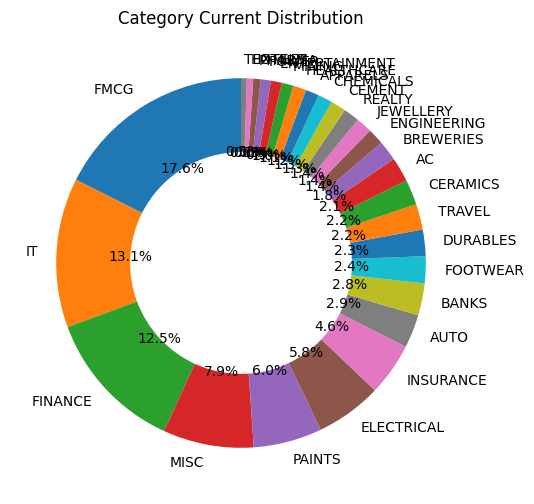

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Spread%', 'Conviction', 'RSI_14', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
76,TTKPRESTIG,769.29,770.00,101.28,2.35,M-SC,51.0,86676.0,-14101.0,14198.0,...,-13.99,16.38,0.09,245.0,-0.99,0.63,13.87,OX40N,DURABLES,NTT
2,ABBOTINDIA,30226.00,35195.00,-12.50,3.15,X-MC,47.0,88650.0,-2028.0,16932.0,...,-2.24,19.10,16.44,101.0,-0.12,0.64,17.49,X40,PHARMA,ATH
41,ITC,409.28,452.00,-38.42,0.83,X-LC,46.0,198950.0,-1188.0,22083.0,...,-0.59,11.10,10.44,4.0,-0.05,1.45,4.94,X40,FMCG,NTT
33,ICICIGI,1874.41,2252.93,-13.83,6.59,X-MC,54.0,185637.0,11317.0,23891.0,...,6.49,12.87,20.19,91.0,0.47,1.35,22.59,X40,INSURANCE,ATH
37,INDIGOPNTS,1407.73,1408.00,127.68,5.23,M-SC,78.0,149116.0,-25443.0,25469.0,...,-14.58,17.08,0.02,221.0,-1.00,1.08,29.71,OX40N,PAINTS,NTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,ACC,2379.51,3906.00,-38.07,2.07,X-MC,48.0,184530.0,-53421.0,206065.0,...,-22.45,111.67,64.15,174.0,-0.26,1.34,3.51,XY24,CEMENT,BTT
72,TATAMOTORS,761.77,1065.00,-53.04,36.18,X-LC,24.0,148993.0,-127530.0,237599.0,...,-46.12,159.47,39.81,54.0,-0.54,1.08,5.01,XY24,AUTO,NTT
58,REPCOHOME,463.60,880.00,-53.80,8.80,H-SC,61.0,265276.0,-21229.0,278566.0,...,-7.41,105.01,89.82,134.0,-0.08,1.93,40.35,XY24,FINANCE,NTT
11,BANDHANBNK,207.88,400.00,-19.01,1.29,H-SC,34.0,202260.0,-76299.0,333749.0,...,-27.39,165.01,92.42,151.0,-0.23,1.47,16.89,XY24,BANKS,NTT


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-42.76,4.98,H-LC,32.0,238968.0,-22651.0,141875.0,...,-8.66,59.37,45.57,7.0,-0.16,1.74,1.68,AR,ELECTRICAL,NTT
2,ABBOTINDIA,30226.00,35195.00,-12.50,3.15,X-MC,47.0,88650.0,-2028.0,16932.0,...,-2.24,19.10,16.44,101.0,-0.12,0.64,17.49,X40,PHARMA,ATH
3,ACC,2379.51,3906.00,-38.07,2.07,X-MC,48.0,184530.0,-53421.0,206065.0,...,-22.45,111.67,64.15,174.0,-0.26,1.34,3.51,XY24,CEMENT,BTT
5,ANGELONE,2329.34,3033.00,22.39,6.67,X-SC,68.0,216595.0,25589.0,32121.0,...,13.40,14.83,30.21,157.0,0.80,1.57,37.08,X40N,FINANCE,NTT
6,ASIANPAINT,2861.00,3465.66,-7.21,6.18,X-LC,74.0,233834.0,-17934.0,71156.0,...,-7.12,30.43,21.13,27.0,-0.25,1.70,25.78,X40,PAINTS,ATH
9,AWL,315.97,485.00,-62.99,2.36,X-SC,59.0,261622.0,-40129.0,201554.0,...,-13.30,77.04,53.50,116.0,-0.20,1.90,16.20,XY24,FMCG,NTT
10,BAJAJHFL,122.26,181.50,-16.14,6.36,X-MC,36.0,176595.0,-23911.0,121056.0,...,-11.93,68.55,48.45,90.0,-0.20,1.28,1.83,X40N,FINANCE,ATH
12,BATAINDIA,1550.24,2096.00,-7.71,8.50,X-SC,27.0,86893.0,-41777.0,87075.0,...,-32.47,100.21,35.20,219.0,-0.48,0.63,0.00,X40,FOOTWEAR,NTT
13,BERGEPAINT,561.33,680.00,-17.50,1.09,X-MC,56.0,221211.0,-6128.0,54197.0,...,-2.70,24.50,21.14,106.0,-0.11,1.61,24.69,XY24,PAINTS,NTT
16,CAMS,3816.00,4762.00,-5.30,1.06,X-SC,50.0,253334.0,1478.0,60952.0,...,0.59,24.06,24.79,122.0,0.02,1.84,23.86,X40N,MISC,NTT


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,525.23,593.0,77.88,16.33,H-SC,16.0,120723.0,-97773.0,125962.0,...,-44.75,104.34,12.90,153.0,-0.78,0.88,0.00,OX40N,FINANCE,NTT
17,CERA,7647.97,9475.0,-26.49,1.90,H-SC,34.0,133837.0,-42066.0,84090.0,...,-23.91,62.83,23.89,149.0,-0.50,0.97,15.59,OX40N,CERAMICS,NTT
37,INDIGOPNTS,1407.73,1408.0,127.68,5.23,M-SC,78.0,149116.0,-25443.0,25469.0,...,-14.58,17.08,0.02,221.0,-1.00,1.08,29.71,OX40N,PAINTS,NTT
42,JCHAC,2282.24,2282.0,19943.48,1.49,M-SC,63.0,97955.0,-29850.0,29837.0,...,-23.36,30.46,-0.01,232.0,-1.00,0.71,10.92,OX40N,AC,NTT
45,KANSAINER,299.63,340.0,-68.09,2.27,H-SC,40.0,219465.0,-50202.0,86535.0,...,-18.62,39.43,13.47,138.0,-0.58,1.59,11.59,XY24,PAINTS,NTT
54,RAJESHEXPO,517.65,518.0,1639.90,3.67,L-SC,45.0,47483.0,-89694.0,89786.0,...,-65.39,189.09,0.07,267.0,-1.00,0.35,18.09,OX40N,JEWELLERY,NTT
62,SFL,1016.35,1287.0,29.90,3.37,M-SC,43.0,171441.0,-90777.0,160606.0,...,-34.62,93.68,26.63,229.0,-0.57,1.25,6.59,XY24,MISC,NTT
65,SIS,435.42,528.0,2010.36,2.23,H-SC,45.0,85170.0,-25862.0,49467.0,...,-23.29,58.08,21.26,156.0,-0.52,0.62,15.07,OX40N,MISC,NTT
69,SYMPHONY,1306.42,1306.0,-44.56,16.02,M-SC,44.0,118273.0,-52868.0,52809.0,...,-30.89,44.65,-0.03,196.0,-1.00,0.86,3.11,OX40N,DURABLES,NTT
71,TATAELXSI,6938.68,9161.0,-25.73,6.46,H-MC,42.0,100386.0,-31449.0,73673.0,...,-23.85,73.39,32.03,98.0,-0.43,0.73,12.44,OX40N,IT,NTT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
3,ACC,2379.51,3906.00,-38.07,2.07,X-MC,48.0,184530.0,-53421.0,206065.0,...,-22.45,111.67,64.15,174.0,-0.26,1.34,3.51,XY24,CEMENT,BTT
8,ATULAUTO,579.80,844.00,3591.89,3.81,M-SC,53.0,165818.0,-31314.0,121147.0,...,-15.88,73.06,45.57,236.0,-0.26,1.21,17.56,XY24,AUTO,NTT
9,AWL,315.97,485.00,-62.99,2.36,X-SC,59.0,261622.0,-40129.0,201554.0,...,-13.30,77.04,53.50,116.0,-0.20,1.90,16.20,XY24,FMCG,NTT
11,BANDHANBNK,207.88,400.00,-19.01,1.29,H-SC,34.0,202260.0,-76299.0,333749.0,...,-27.39,165.01,92.42,151.0,-0.23,1.47,16.89,XY24,BANKS,NTT
13,BERGEPAINT,561.33,680.00,-17.50,1.09,X-MC,56.0,221211.0,-6128.0,54197.0,...,-2.70,24.50,21.14,106.0,-0.11,1.61,24.69,XY24,PAINTS,NTT
15,CAMPUS,294.86,393.00,-24.98,4.51,M-SC,45.0,156276.0,-11499.0,67339.0,...,-6.85,43.09,33.28,210.0,-0.17,1.14,21.12,XY24,FOOTWEAR,NTT
18,COALINDIA,406.65,484.83,5.81,2.64,L-LC,57.0,141636.0,-8824.0,37746.0,...,-5.86,26.65,19.23,167.0,-0.23,1.03,14.16,XY25,MINING,ATH
20,COLPAL,2633.65,3726.84,-6.41,7.10,X-MC,43.0,218210.0,-45155.0,154471.0,...,-17.15,70.79,41.51,84.0,-0.29,1.59,2.40,XY25,FMCG,ATH
21,DABUR,511.48,735.00,-6.83,2.80,X-MC,59.0,252176.0,4108.0,104300.0,...,1.66,41.36,43.70,102.0,0.04,1.83,16.96,XY24,FMCG,BTT
24,EASEMYTRIP,18.12,26.40,-19.77,27.44,M-SC,41.0,77283.0,-99532.0,180324.0,...,-56.29,233.33,45.70,197.0,-0.55,0.56,0.89,XY24,TRAVEL,NTT


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-42.76,4.98,H-LC,32.0,238968.0,-22651.0,141875.0,...,-8.66,59.37,45.57,7.0,-0.16,1.74,1.68,AR,ELECTRICAL,NTT
4,ALKYLAMINE,2347.98,4546.37,-19.73,4.22,H-SC,30.0,75749.0,-25214.0,119744.0,...,-24.97,158.08,93.63,148.0,-0.21,0.55,12.83,SR,CHEMICALS,ATH
7,ASIANTILES,75.41,137.00,7555.56,14.06,L-SC,67.0,83970.0,-9840.0,86456.0,...,-10.49,102.96,81.67,269.0,-0.11,0.61,62.61,XR,CERAMICS,NTT
14,BSOFT,551.58,836.99,-13.25,9.72,H-SC,61.0,97576.0,-43077.0,115862.0,...,-30.63,118.74,51.74,131.0,-0.37,0.71,12.89,XR,IT,ATH
19,COFFEEDAY,59.14,80.00,-47.69,27.23,L-SC,42.0,76608.0,-36941.0,76991.0,...,-32.53,100.50,35.27,268.0,-0.48,0.56,87.50,XR,HOTELS,NTT
22,DEN,52.79,75.00,83.94,5.42,M-SC,34.0,51360.0,-33104.0,68638.0,...,-39.19,133.64,42.07,237.0,-0.48,0.37,9.07,AR,ENTERTAINMENT,NTT
27,HAPPSTMNDS,801.03,1480.71,-25.24,16.06,H-SC,43.0,80672.0,-47493.0,156246.0,...,-37.06,193.68,84.85,132.0,-0.30,0.59,3.54,AR,IT,ATH
28,HATHWAY,18.12,31.40,820.29,8.98,H-SC,30.0,79320.0,-29400.0,109081.0,...,-27.04,137.52,73.29,161.0,-0.27,0.58,6.10,XR,ENTERTAINMENT,NTT
35,IEX,147.35,219.00,-33.86,15.97,H-SC,46.0,189084.0,-10870.0,108099.0,...,-5.44,57.17,48.63,115.0,-0.10,1.37,5.49,XR,MISC,NTT
36,INDIAMART,2327.09,4810.62,-53.52,5.08,H-SC,53.0,129956.0,6620.0,125005.0,...,5.37,96.19,106.72,119.0,0.05,0.94,30.00,AR,MISC,ATH


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.54
1,20,38.16
2,30,53.22


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,46.88
LC,28.24
MC,24.89


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,28.03
X40,19.93
X40N,12.87
XY25,10.56
XR,10.02
AR,7.97
OX40N,6.83
X200,1.87
SR,1.04


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,24.69
X-MC,22.14
X-LC,19.96
M-SC,13.02
X-SC,7.65
H-LC,4.71
M-LC,2.54
H-MC,2.41
L-SC,1.52


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          10.06
X40       X-MC           9.91
          X-LC           9.39
XY24      M-SC           6.27
XR        H-SC           6.09
XY24      X-MC           4.78
X40N      X-SC           4.77
          X-MC           4.44
AR        H-SC           4.14
XY25      X-LC           3.92
X40N      X-LC           3.66
OX40N     M-SC           3.28
XY25      X-MC           3.01
XY24      X-LC           2.99
AR        H-LC           2.84
OX40N     H-SC           2.47
XY24      X-SC           2.25
X200      H-LC           1.87
XY24      H-MC           1.68
XY25      M-LC           1.45
XR        M-SC           1.33
          L-SC           1.17
XY25      M-SC           1.15
XR        M-LC           1.09
SR        H-SC           1.04
XY25      L-LC           1.03
AR        M-SC           0.99
MH        H-SC           0.89
OX40N     H-MC           0.73
X40       X-SC           0.63
OX40N     L-SC           0.35
XR        L-MC           0.34
Name: CurrAlloc%, dtype: float64

In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,17.57,-4.15,37.83
IT,13.08,-16.80,79.33
FINANCE,12.53,-9.71,59.44
MISC,7.94,-18.87,78.83
PAINTS,5.98,-12.11,28.82
ELECTRICAL,5.81,-12.99,53.05
INSURANCE,4.62,0.48,34.59
AUTO,2.91,-43.51,103.41
BANKS,2.80,-38.76,129.19


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,76.1,10469461.0,-10.97,-1148570.0,53.11,5560132.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,58.37,8031482.0,-7.38,-592496.0,43.49,3492812.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3141126.0
XR,1278847.0
AR,1190013.0
X40,949767.0
X40N,695832.0
OX40N,545291.0
XY25,481941.0
SR,276820.0
X200,67121.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3433358.0
M-SC,1253346.0
X-MC,1182370.0
X-LC,1010749.0
X-SC,758233.0
H-LC,291466.0
H-MC,255687.0
L-SC,253233.0
M-LC,156736.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1188470.0
AR        H-SC           841581.0
XR        H-SC           805290.0
XY24      M-SC           728229.0
X40       X-LC           433364.0
          X-MC           429328.0
XY24      X-SC           369638.0
          X-MC           364562.0
          X-LC           308213.0
X40N      X-SC           301520.0
SR        H-SC           276820.0
OX40N     H-SC           259519.0
AR        H-LC           224345.0
X40N      X-MC           200078.0
          X-LC           194234.0
XY25      X-MC           188402.0
XY24      H-MC           182014.0
XR        L-SC           163447.0
          M-SC           144040.0
XY25      M-SC           134677.0
AR        M-SC           124087.0
OX40N     M-SC           122313.0
XR        M-LC           110558.0
OX40N     L-SC            89786.0
X40       X-SC            87075.0
XY25      X-LC            74938.0
OX40N     H-MC            73673.0
X200      H-LC            67121.0
MH        H-SC            61678.0
XR        L-MC            55512.0
XY25      M-LC            46178.0
          L-LC            37746.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,24
X-MC,15
M-SC,15
X-LC,11
X-SC,7
H-LC,3
L-SC,3
M-LC,2
H-MC,2
